 **Atividade 2.2 - Hamilton Celerino da Fonseca Neto**

#Import e Dataset

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [20]:
data = load_iris()
X = data.data[:, :2]
y = data.target.astype(float).reshape(-1, 1)

print("Dimensões X:", X.shape)
print("Dimensões y:", y.shape)

Dimensões X: (150, 2)
Dimensões y: (150, 1)


# Normalização


In [23]:
# Normalização dos dados
X = (X - X.mean(axis=0)) / X.std(axis=0)

print("Primeiras 10 linhas de X normalizado:")
print(X[:10])


Primeiras 10 linhas de X normalizado:
[[-0.90068117  1.01900435]
 [-1.14301691 -0.13197948]
 [-1.38535265  0.32841405]
 [-1.50652052  0.09821729]
 [-1.02184904  1.24920112]
 [-0.53717756  1.93979142]
 [-1.50652052  0.78880759]
 [-1.02184904  0.78880759]
 [-1.74885626 -0.36217625]
 [-1.14301691  0.09821729]]


# Inicialização


In [25]:
# Inicialização dos parâmetros
np.random.seed(42)
W = np.random.randn(2, 1)
b = np.random.randn(1)

# Guardar cópia dos parâmetros não treinados
W_init = W.copy()
b_init = b.copy()

print("Pesos iniciais:", W_init.ravel())
print("Bias inicial:", b_init)


Pesos iniciais: [ 0.49671415 -0.1382643 ]
Bias inicial: [0.64768854]


# MSE e perda inicial

In [26]:
# MSE e perda inicial
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

y_pred_init = X @ W_init + b_init
loss_init = mse(y, y_pred_init)

print("Perda MSE com parâmetros não treinados:", loss_init)


Perda MSE com parâmetros não treinados: 0.3416886146200339


# Plot

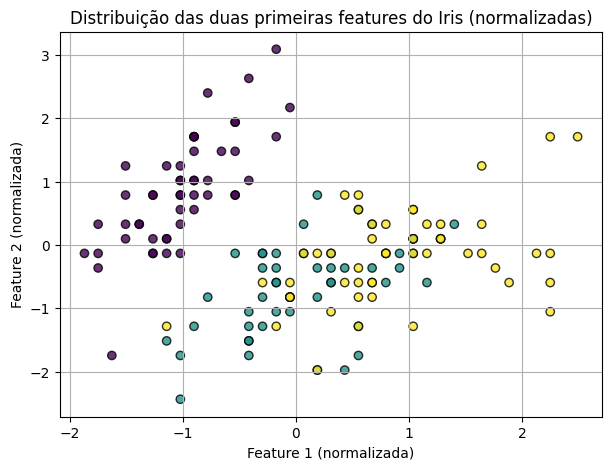

In [28]:
# Scatter plot das duas primeiras features
plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=y.ravel(), cmap='viridis', edgecolor='k', alpha=0.8)
plt.xlabel('Feature 1 (normalizada)')
plt.ylabel('Feature 2 (normalizada)')
plt.title('Distribuição das duas primeiras features do Iris (normalizadas)')
plt.grid(True)
plt.show()


# Gradiente Descendente


In [29]:
# Treinamento via Gradiente Descendente
learning_rate = 0.01
epochs = 200

loss_history = []

for epoch in range(epochs):
    y_pred = X @ W + b
    loss = mse(y, y_pred)
    loss_history.append(loss)

    dW = (2/len(X)) * X.T @ (y_pred - y)
    db = (2/len(X)) * np.sum(y_pred - y)

    W -= learning_rate * dW
    b -= learning_rate * db

print("Última perda após gradiente descendente:", loss_history[-1])


Última perda após gradiente descendente: 0.1827353832504808


# Plot (evolução da perda)

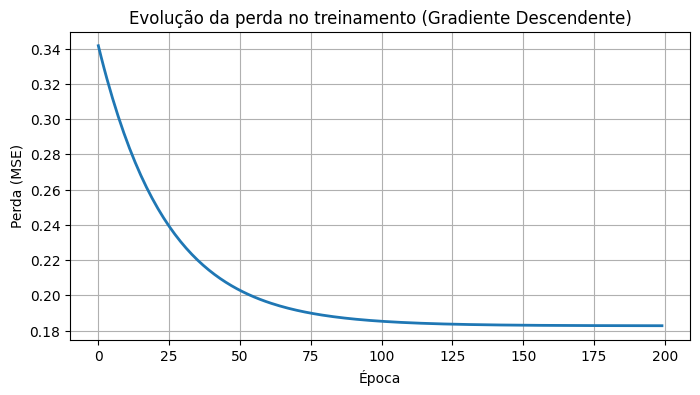

In [30]:
# Plot da evolução da perda
plt.figure(figsize=(8,4))
plt.plot(loss_history, linewidth=2)
plt.xlabel("Época")
plt.ylabel("Perda (MSE)")
plt.title("Evolução da perda no treinamento (Gradiente Descendente)")
plt.grid(True)
plt.show()


# Comparação

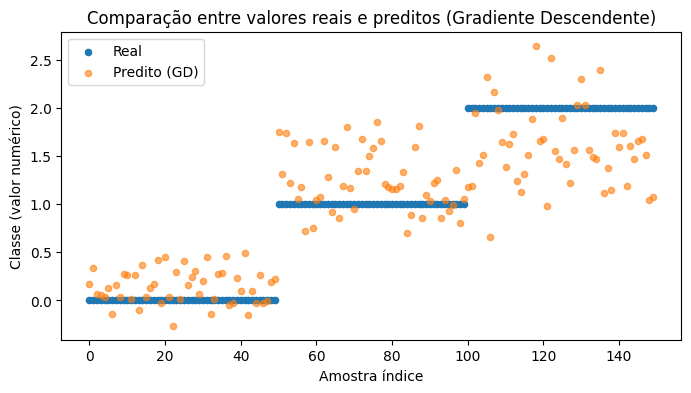

In [31]:
# Comparação real x predito
y_pred_gd = X @ W + b

plt.figure(figsize=(8,4))
plt.scatter(range(len(y)), y, label='Real', s=20)
plt.scatter(range(len(y_pred_gd)), y_pred_gd, label='Predito (GD)', s=20, alpha=0.6)
plt.legend()
plt.title('Comparação entre valores reais e preditos (Gradiente Descendente)')
plt.xlabel('Amostra índice')
plt.ylabel('Classe (valor numérico)')
plt.show()


# Solução Analítica

In [32]:
#Solução analítica
X_ext = np.hstack([X, np.ones((X.shape[0], 1))])
W_analytical_full = np.linalg.inv(X_ext.T @ X_ext) @ X_ext.T @ y

W_analytical = W_analytical_full[:-1]
b_analytical = W_analytical_full[-1]

print("Pesos analíticos:", W_analytical.ravel())
print("Bias analítico:", b_analytical)


Pesos analíticos: [ 0.60638326 -0.27707209]
Bias analítico: [1.]


# Comparação Final

In [33]:
# Perdas finais e comparação
y_pred_analytical = X @ W_analytical + b_analytical
loss_analytical = mse(y, y_pred_analytical)
loss_gd = loss_history[-1]

print("Perda inicial (sem treinar):", loss_init)
print("Perda final (gradiente descendente):", loss_gd)
print("Perda (solução analítica):", loss_analytical)

print("\nDiferença absoluta entre GD e analítica:", abs(loss_gd - loss_analytical))


Perda inicial (sem treinar): 0.3416886146200339
Perda final (gradiente descendente): 0.1827353832504808
Perda (solução analítica): 0.1826908197394774

Diferença absoluta entre GD e analítica: 4.456351100340372e-05


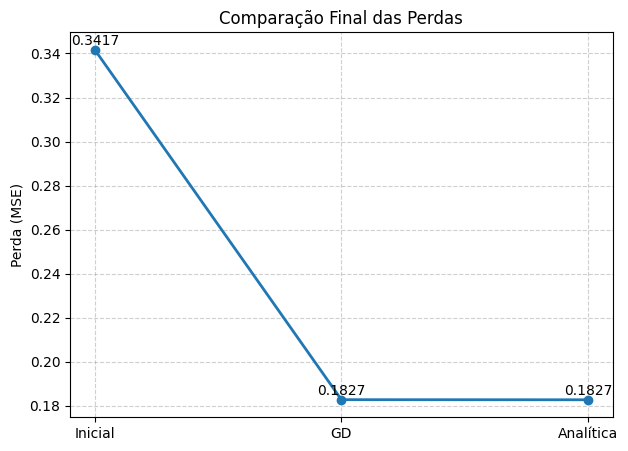

In [38]:
plt.figure(figsize=(7,5))

plt.plot(['Inicial', 'GD', 'Analítica'],
         [loss_init, loss_history[-1], loss_analytical],
         marker='o', linewidth=2)

plt.ylabel("Perda (MSE)")
plt.title("Comparação Final das Perdas")

# Mostrar valores nos pontos
for label, value in zip(['Inicial', 'GD', 'Analítica'],
                        [loss_init, loss_history[-1], loss_analytical]):
    plt.text(label, value + 0.002, f"{value:.4f}", ha='center', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
